# Review text analysis

In [2]:
# import the required libraries here
# two lines of code here:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
reviews = pd.read_csv('reviews_filtered.csv')

Let's remind ourselves what our review DataFrame looked like, and check we're reading it in as expected.

In [4]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,a0v7Si0DK4cIko7AQY4YXg,0,2018-04-05 19:18:02,0,BwoZqgwvDZ3AyHcqJDus4A,5,I'm here at least once a week. This location i...,1,p4qC9hDxk3wwPa3EUwhuKQ
1,EyPDvFnc8Jh1kAZZMHoApQ,0,2016-02-14 04:07:46,0,Txviop71rAsRKl0Div9sew,1,"I didn't apparently get the entire ""MOD Experi...",0,8QxEkytfVLIgkmnnEXVw0Q
2,tjAeaGdxf7I4xN9M7wGJNQ,0,2018-01-11 05:31:34,0,CYoUdBiSw5Ji7PE8PrGfKw,5,I ordered the lunch special ( any one topping ...,1,NF3vUYgz6DFd8YPQmzB1WQ
3,scoJNOqcw2peNlO31UYTaA,0,2013-05-12 01:50:22,1,yUAuey_JVSK64JtFrFr-Uw,4,"$7.00 for a ""create your own"" pizza? Yes pleas...",2,vPOkQJKahhR13LQ2ElSFGg
4,0h5yI6np7weAVH0jsjHqPw,0,2015-02-05 02:35:03,0,3VCIP8tX2zx6jnh0b0uC2Q,2,I really wanted to give this place more stars ...,0,OW0PZxoGFGSOthAmN_cSUg


We see the first review wasn't great, at two stars, but the second got five stars. Let's have a quick look at the full text for each.

## A two star review

In [5]:
reviews.loc[0, 'text']

"I'm here at least once a week. This location is a little crowded and hard to get to and sometimes the wait can be a bit long, but it's all well worth it. Great American breakfast food. The portions are generous, seasoned potatoes are great, and the banana nut muffins are warm, sticky, and one of a kind. Our server, Tina, had an extensive knowledge of the menu and very friend. Highly recommend any of these locations around town for a fantastic brunch."

This review does appear somewhat lukewarm, at best. On another note, we can see it talks about pizza and italian, which is some reassurance we made a good decision to combine the pizza and italian categories.

## A five star review

In [6]:
reviews.loc[1, 'text']

'I didn\'t apparently get the entire "MOD Experience" (that I\'ve seen people on here complain of) as, I had to leave. I called ahead to ensure that this location had gluten-free pizza. We entered MOD & were not even greeted. We had to engage the employees in a greeting, etc. We then attempted to order 1 regular pizza & 1 gluten-free pizza. The girl who was reluctantly assisting us asked if the g-free pizza was a preference or an allergy. We stated (allergy) at which point she reached in the cooler/freezer to pull out a pre-made g-free crust (she did not change her gloves, & actually took a regular crust off an aluminum pan & put the g-free crust directly on the contaminated aluminum pan). I will NEVER eat @ this establishment & I would recommend that anyone who has to eat g-free to avoid this place.'

This certainly seems to be a good review. We'd be happy to see our restaurant associated with "cool atmosphere", "all around great experience" etc.

## Good and bad reviews
We don't want to have to read all the reviews in our dataset in order to find good and bad ones. Clearly 5 is best and 1 is worst, but how do we group them? Do we set a threshold in the middle, or just take the top and bottom ratings? Let's first see what the distribution of ratings looks like.

In [7]:
reviews['stars'].describe()

count    586699.000000
mean          3.718172
std           1.403293
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [8]:
star_counts = reviews['stars'].value_counts()

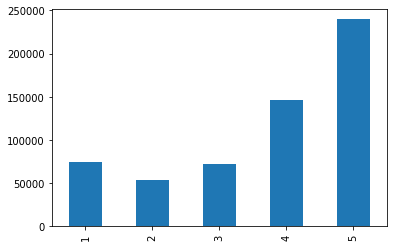

In [9]:
# task: create a bar plot of number of reviews for each star rating
# hint: sort_index may be useful to get your x-axis in the most intuitive order
star_counts.sort_index().plot(kind='bar')

This is useful. It seems reviews with three stars or fewer are in the bottom quartile and reviews with five stars are in the top quartile. We could take five stars as being a single, best category, and three stars and fewer as being 'not good'.

## Visualizing reviews
From our analysis of the distribution of review star ratings, our first approach to delivering an answer to the marketing team will be to look at the most popular words in the best reviews and compare them with those in the worst reviews.

First, let's extract the good and bad reviews separately.

In [10]:
# task, filter the 'text' column using the 'stars' column to create Series of good and bad review text
# call the results good_review_text and bad_review_text, respectively
# two lines of code here:
good_review_text = reviews.loc[reviews.stars ==5, 'text']
bad_review_text = reviews.loc[reviews.stars <=3, 'text']

We can now double check how many rows we have, and that they seem to agree with the numbers of reviews we'd expect from the distribution of stars ratings above.

In [11]:
good_review_text.shape

(239563,)

In [12]:
bad_review_text.shape

(201001,)

Now that's actually quite a lot of reviews. For our purposes here, we'll start by just selecting the first 1000 reviews from each group on the assumption that they're randomly ordered. We'll also add a slight tidying step of converting the characters to lower case so we don't count 'Bad' and 'bad', for example, separately.

In [13]:
# task: select the first 1000 items in each of the good and bad review text Series and chain the
# str.lower() method to convert characters to lower case. Save the results back in place.
# two lines of code here:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [14]:
# Check first few good reviews
good_review_text.head()

0    i'm here at least once a week. this location i...
2    i ordered the lunch special ( any one topping ...
5    this is exactly what a neighborhood pizza plac...
7    wow! really good italian food with a grocery s...
8    we absolutely love this place. where do i star...
Name: text, dtype: object

In [15]:
# check first few bad reviews
bad_review_text.head()

1     i didn't apparently get the entire "mod experi...
4     i really wanted to give this place more stars ...
6     i must have ordered the wrong thing. got the b...
9     ordered for the first time from here. we order...
15    c'est en fin de soirг©e et sur recommandation ...
Name: text, dtype: object

So far, we've partitioned our reviews into groups we think of as 'great' and 'bad'. Our problem now is how to make sense of this. How do we interpret, or visualise, the information? A great way to get a visual look at how frequently certain words occur is by a wordcloud. A nice introduction to creating wordclouds is [here](https://www.datacamp.com/community/tutorials/wordcloud-python) in a DataCamp community article. You'll likely want to pay attention to the step for installing the relevant library in order to get the next import statement to work.

In [16]:
# task: import WordCloud and STOPWORDS here
# one line of code here
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

We first need to gather the reviews into a single corpus, for each of good and bad reviews, for wordcloud.

In [17]:
# task: combine all the good and bad review text into a single string for each
# two lines of code here
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

### Good wordcloud

Now, at last, we can create a wordcloud! Let's look at the top 50 words from the best reviews.

In [18]:
# task: generate a wordcloud of good review words, max 50 words
# one line of code here, call the result good_wordcloud
good_wordcloud = WordCloud(max_words=50).generate(good_text)

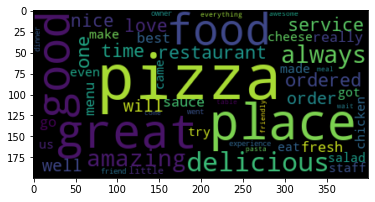

In [19]:
plt.imshow(good_wordcloud, interpolation='bilinear')

This is great! It looks sensible. In fact, someone from marketing just walked past your screen and already is interested in taking this image as it is and using it! They're so excited they would like a copy of that image to test in laying out their new marketing designs.

In [20]:
# task: use the to_file method for wordcloud to save the above image to send to marketing
# one line of code here
good_wordcloud.to_file('good_wordcloud.png')

### Bad wordcloud

Can we learn anything extra from looking at the top words in bad reviews?

In [21]:
# task: generate a wordcloud of bad review words, max 50 words
# one line of code here, call the result bad_wordcloud
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

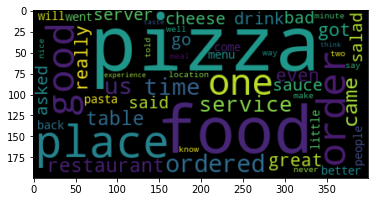

In [22]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

We notice some things here. Firstly, 'pizza' is a very prominent word, but it was in the top reviews as well. It's very obviously a relevant word for our target category, but is it useful in separating good and bad reviews? Probably not. We can also start to make some interesting observations that there seem to be more "dull" words here, such as "told", "said", "came", and "went". There is clearly a different tone between our two wordclouds. We've definitely achieved something useful here.

# Summary
Congratulations! You've achieved a lot since starting this project. You've related a business problem to a dataset and identified which data you needed. You've drilled into that data to answer an initial question of which food category the business should target. Then you've used knowledge gained from that to extract just the related reviews from a large file that, otherwise, would be too large to handle. You've further teased apart the best and the worst reviews to look at them separately and clearly seen there is a difference.

You already have a useful output, but you know that there's more that can be done. The rest of the notebook is entirely optional and gives some ideas for how you might refine what you've already done.

# Towards a better wordcloud

Having seen that some words that occur prominently in bad reviews were also in our good reviews, we can exclude these from our wordcloud by specifying them as stopwords. Let's add them to the list of default stopwords STOPWORDS.

In [23]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [25]:
# task: create a set of stopwords and add the "bad" ones above to it
# two lines of code here:
stopwords=set(STOPWORDS)
stopwords.update(bad_stopwords)

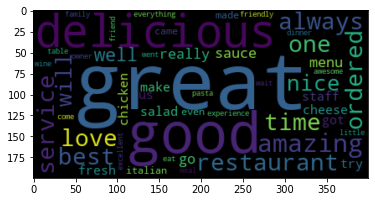

In [26]:
# task: generate a better wordcloud of good review words, max 50 words
# one line of code here, call the result better_wordcloud
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')

Hopefully you can see we've now excluded some words. We'll leave it up to you and your marketing team whether you prefer the above version!

# Beyond words
The use of single words is a good start, but words occur in sequences and sequences can have much additional meaning. Consider a good review that said "Highly recommended" and a bad review that said "Not recommended". Analysing just single words, we would lose the "highly recommended" tag. What's more, with the approach of looking for words in good reviews that aren't in bad reviews, we would lose the word "recommended" entirely. Using sequences of two words, or bi-grams as they're known, would tackle this issue. Generally, in fact, we can consider n-grams.